# Assignment 6: Nearest Neighbour and Artificial Neural Networks

## Objective of this assignment
The objective of this exercise is to understand how k-nearest neighbor and neural networks can be used to solve classification problems.

## ** Important: ** When handing in your homework:
+ Hand in the notebook (and nothing else) named as follows: StudentName1_snumber_StudentName2_snumber.ipynb
+ Provide clear and complete answers to the questions below under a separate header (not hidden somewhere in your source code), and make sure to explain your answers / motivate your choices. Add Markdown cells where necessary.
+ Source code, output graphs, derivations, etc., should be included in the notebook.
+ Hand-in: upload to Brightspace.
+ Include name, student number, assignment (especially in filenames)!
+ When working in pairs only one of you should upload the assignment, and report the name of your partner in your filename.
+ For problems or questions: come to the practical sessions or email the student assistants.


## Advised Reading and Exercise Material
**The following reading material is recommended:**

- Pang-Ning Tan, Michael Steinbach, and Vipin Kumar, *Introduction to Data Mining*, section 5.2-5.4.


## Additional Tools
For this exercise you will need to load the provided *MLPPlot.py* script.

This exercise is based upon material kindly provided by the Cognitive System Section, DTU Compute, http://cogsys.compute.dtu.dk. Any sale or commercial distribution is strictly forbidden.


##  6.1 K-nearest neighbor classification
In this exercise we will use the k-nearest neighbors (KNN) method for classification.
First, we will consider the four synthetic data sets synth1, synth2, synth3 and
synth4 we used in earlier assignments.

#### 6.1.1 (2 points)
For each of the four synthetic data sets, do the following. Load the complete dataset `X` and examine it by making a scatter plot, coloring the points by their class in `y`. Don't forget to add a legend. Classify the data `X` using the k-nearest neighbor classifier `KNeighborsClassifier` from `sklearn.neighbors` (http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html). Choose a suitable distance measure (you should consider the distance measures `euclidean` and `cityblock`). Choose a suitable number of neighbors. Make another scatterplot of the new classification (with the best k-value and distance measures you found -- just one plot per data set is fine). Create the confusion matrix, plot it using the function given below, and calculate the accuracy and error rate from these numbers.

*Hints: To generate a confusion matrix, you can use the function confusion_matrix() from the module sklearn.metrics. You can use the function below to plot the confusion matrix. Don't remember how to read a confusion matrix? Check the wiki page: https://en.wikipedia.org/wiki/Confusion_matrix*

Which distance measures worked best for each of the four problems? Can you explain why? How many neighbors were needed for the four problems? Can you give
an example of when it would be good to use a large/small number of neighbors?
Consider e.g. when clusters are well separated versus when they are overlapping.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from seaborn import heatmap
from scipy.io import loadmat
from pandas import DataFrame
from pandas import read_excel

from matplotlib.colors import ListedColormap

from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

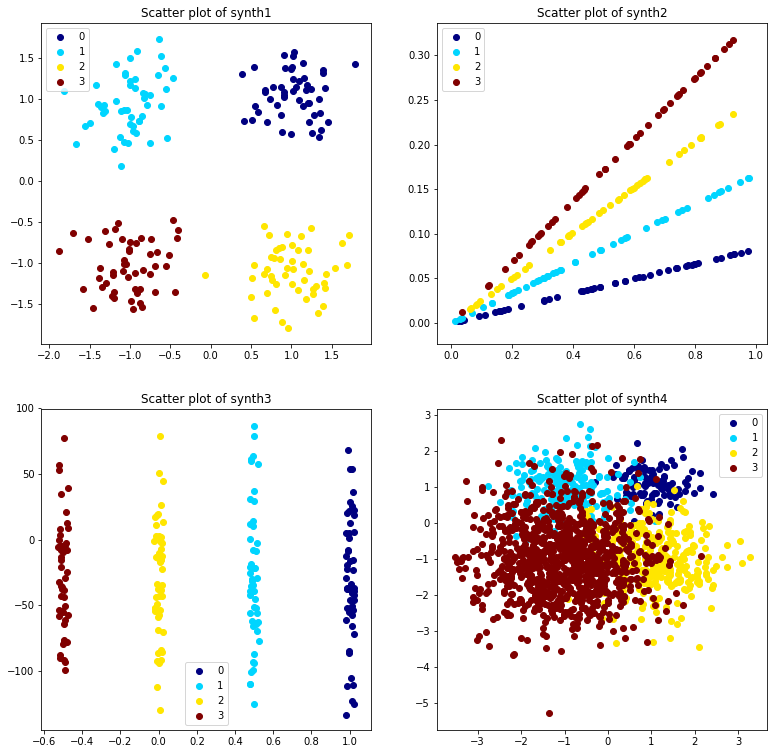

In [2]:
fig = plt.figure(figsize=(13,13))

for n in range (1,5):
    data = loadmat('Data/synth' + str(n) + '.mat')
    x = data['X'][:,0]
    y = data['X'][:,1]
    classes = data['y'].flatten()
    
    plt.subplot(2,2,n)
    plt.title('Scatter plot of synth' + str(n))
    
    unique = list(set(classes))
    colors = [plt.cm.jet(float(i)/max(unique)) for i in unique]
    for i, u in enumerate(unique):
        xi = [x[j] for j  in range(len(x)) if classes[j] == u]
        yi = [y[j] for j  in range(len(x)) if classes[j] == u]
        plt.scatter(xi, yi, c=colors[i], label=str(u))
    plt.legend()

plt.show()

In [3]:
def k_neighbors_classifier(measure):
    colors = ListedColormap(['plum','lightblue','palegreen','beige'])
    fig    = plt.figure(figsize=(13,13))

    for n in range (1,5):
        data = loadmat('Data/synth' + str(n) + '.mat')
        X = data['X']
        y = data['y'].ravel()

        clf = KNeighborsClassifier(1, metric=measure).fit(X, y)
        u,v = np.meshgrid(np.arange(X[:,0].min(), X[:,0].max(), .05),
                          np.arange(X[:,1].min(), X[:,1].max(), .05))
        Z = clf.predict(np.c_[u.ravel(), v.ravel()])
        Z = Z.reshape(u.shape)

        plt.subplot(2,2,n)
        plt.title(measure + ' KNeighborsClassifier plot of synth' + str(n))
        plt.pcolormesh(u, v, Z, cmap=colors)
        plt.scatter(X[:,0], X[:,1], c=y)
    plt.show()

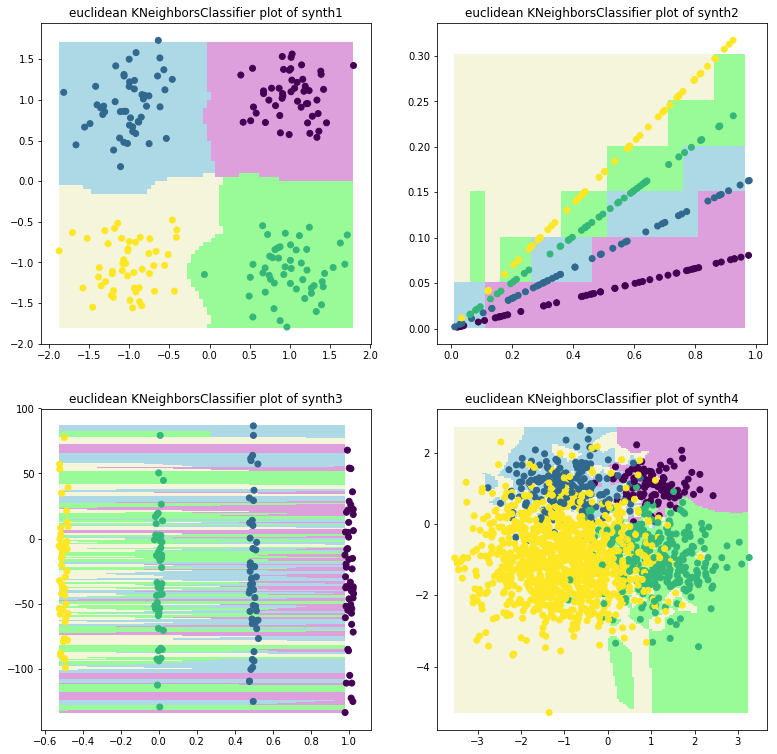

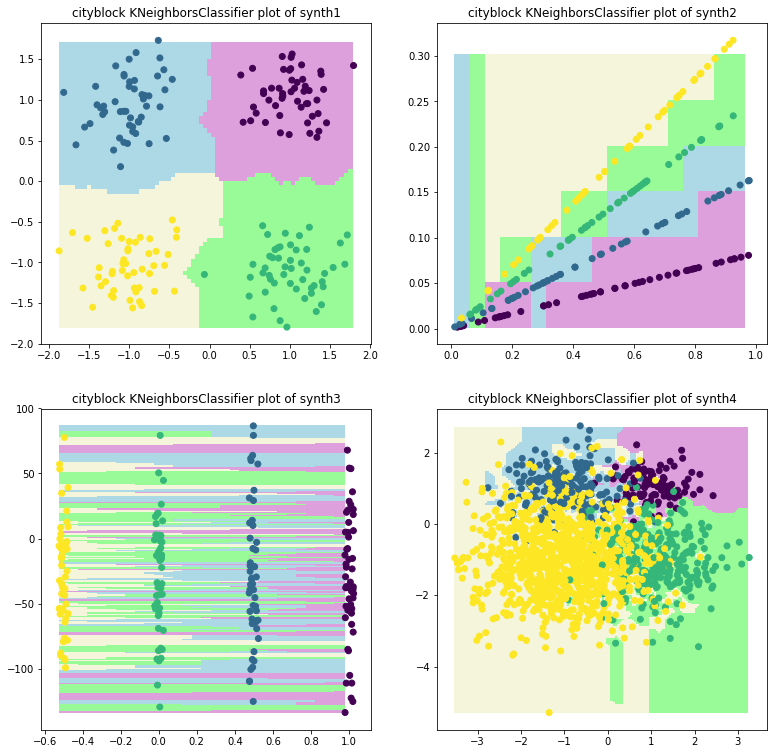

In [4]:
k_neighbors_classifier('euclidean')
k_neighbors_classifier('cityblock')

In [5]:
def plot_confusion_matrix(cm, y, n):
    df_cm = DataFrame(cm, index=[i+1 for i in np.unique(y)], columns=[i+1 for i in np.unique(y)])
    plt.subplot(2,2,n)
    heatmap(df_cm, annot=True)
    plt.title ('Confusion matrix of synth' + str(n))
    plt.xlabel('Predicted class')
    plt.ylabel('Actual class')

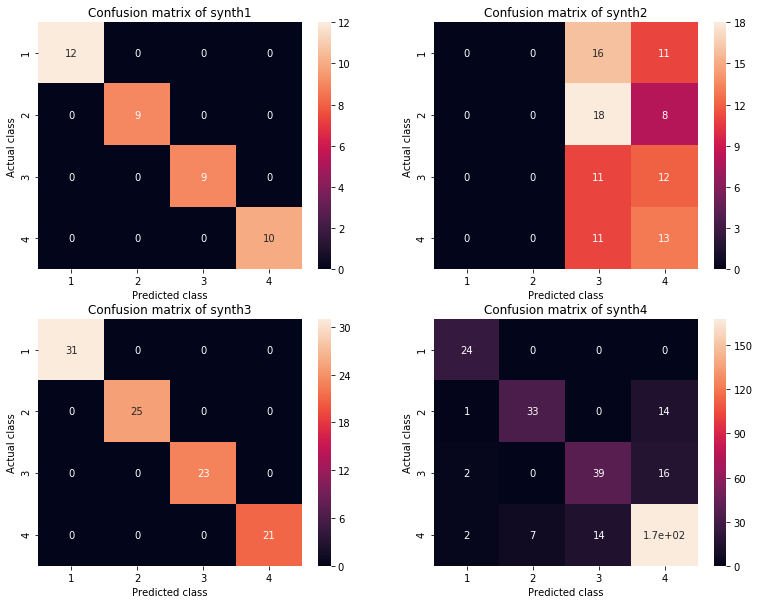

In [6]:
fig = plt.figure(figsize=(13,10))
for n in range (1,5):
    data = loadmat('Data/synth' + str(n) + '.mat')
    X_train = data['X_train']
    X_test  = data['X_test']
    y_train = data['y_train'].ravel()
    y_test  = data['y_test'].ravel()

    classifier = svm.SVC(kernel='linear')
    y_pred = classifier.fit(X_train, y_train).predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, data['y'], n)
plt.show()

Euclidean seems to work better than cityblock. Not many neighbors were needed to get a decent scatterplot. When clusters are very close to each other or even overlapping it is better to have a large number of neighbord, because those neighbors are all close to each other. But when the clusters are very well seperated not a large number of neighbors is required because the neighbors from other clusters are very far away.

#### 6.1.2 (1 points)
In general we can use cross-validation to select the optimal distance metric and
number of nearest neighbors k although this can be computationally expensive. We now return to the Iris data that we have considered in previous exercises, and will attempt to classify the Iris flowers using KNN. Load the Iris data into Python with the `pandas` function `read_excel()`. Inspect the data by printing the `head()`. Use the values of the 4 variables `Sepal Length,  Sepal Width,  Petal Length,  Petal Width` to create a data set `X`. Use the `Type` column to create the labels `y`. Use leave-one-out cross-validation to estimate the number of neighbors, k, for the k-nearest neighbor classifier. Plot the cross-validation average classification error as a function of k for $k = 1,..,40$.

You can use the function `LeaveOneOut` from `sklearn.model_selection`: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html

What is the optimal number of neighbors to use for this data?

   Sepal Length  Sepal Width  Petal Length  Petal Width         Type
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


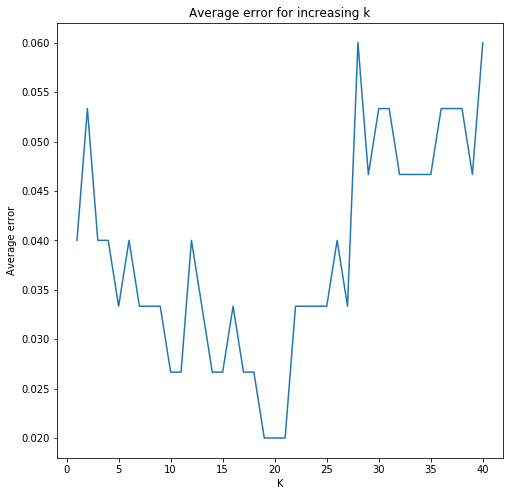

In [7]:
data = read_excel('Data/iris.xls')
X = data[['Sepal Length','Sepal Width','Petal Length','Petal Width']].values
y = data[['Type']].values
print data.head()

errors = []
k_matrix = np.zeros((len(y),40))

for train, test in LeaveOneOut().split(X):
    X_train = X[train,:]
    X_test  = X[test,:]
    y_train = y[train].ravel()
    y_test  = y[test].ravel()
    
    for k in range(1,41):
        knc = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
        X_pred = knc.predict(X_test)
        k_matrix[test[0]][k-1] = 1 - accuracy_score(y_test, X_pred)

for k in range(0, 40):
    errors.append(k_matrix[:,k].mean())

plt.figure(figsize=(8,8))
plt.plot(np.arange(1,41), errors)
plt.title('Average error for increasing k')
plt.xlabel('K')
plt.ylabel('Average error')
plt.show()

The optimal number of neighbors is 19. This is because the error for 19, 20 and 21 is the lowest. And 19 is lower than 20 and 21. That is why the optimal number of neighbors is 19 and not 20 or 21.

#### 6.1.3 (2 points)

KNN can also be used for regression by predicting the output of an observation
as the average of the output values of its nearest neighbors. Predict the alcohol content of wine in the `Wine` data with KNN, using the other 10 attributes as predictors (ie. 'nearest' is based on those 10 other attributes). Plot the mean squared error of the predictions compared to the actual alcohol content as a function of the number of nearest neighbors k for $k = 1,..,40$. What is the optimal value for the number of nearest neighbors?

Perform the regression on all observations; no need to do cross-validation here. 

*Hints: Use the `NearestNeighbors` class and the function `kneighbors()` to find the nearest neighbors -- check the doc and read what this function does.*
http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html

*Make a matrix `X` containing the first 10 attributes, and a vector `alcohol` containing the 11th attribute. Fit `X`, and get indices of the 41 nearest neighbors from the `kneigbors()` function. Use these indices to create an Nx41 matrix containing the alcohol values of the 40 closest neigbors for each of the N wines.*

*Predict each observation as the mean of the alcohol content of its k nearest neighbors. Make sure you don't include the value for the observation itself!*

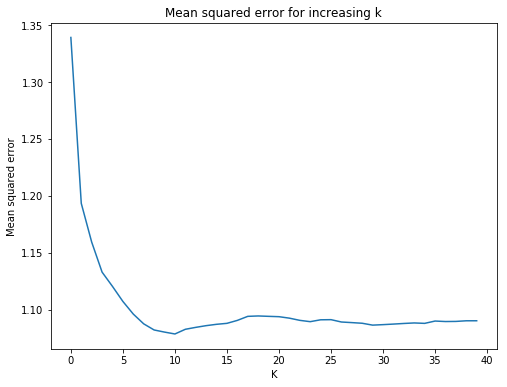

In [8]:
wine = loadmat('Data/wine.mat')
X = wine['X'][:,:10]
alcohol = wine['X'][:,10]

mse = []
nn  = NearestNeighbors(41).fit(X)
knn = nn.kneighbors(X, return_distance=False)

for k in range(2,42):
    errors   = []
    alcohols = [alcohol[index] for index in knn[:,1:k]]
    
    for i, alc in enumerate(alcohols):
        errors.append((np.mean(alc)-alcohol[i])**2)
    mse.append(np.mean(errors))

plt.figure(figsize=(8,6))
plt.plot(mse)
plt.title('Mean squared error for increasing k')
plt.xlabel('K')
plt.ylabel('Mean squared error')
plt.show()

The optimal value is clearly 10. This is simply because this is the value for k which has the lowest mean squared error.

## 6.2 Artificial Neural Networks

In this part of the exercise we will use neural networks to classify the xor data. We will consider a network with an input layer, one layer of hidden units and an output layer. The class `sklearn.neural_network.MLPClassifier` can be used to create a Multilayer Perceptron that can minimizes the Cross-Entropy loss function for any dataset X with corresponding labels y. See https://scikit-learn.org/stable/modules/neural_networks_supervised.html 

We use the data contained in `xor.mat` in the Data folder. 

#### 6.2.1 (0.5 points)
Check out the documentation for `MLPClassifier` and read the documentation well. Make sure you understand at least in general terms how the learning process works. Answer the following questions before you continue:

1. For a single perceptron, the activation function can be linear, e.g. $f(x) = x$. However, the activation function used in the MLP class is a non-linear function. Why does it not make sense for a MLP to use such a linear activation function? Hint: what does the following computation simplify to if $f(x)$ is such a simple linear function: $f(Wo*f(Wh*X_i))$?
2. The MLPClassifier has a few optional parameters. For each of the following parameters, explain how changing the parameter might affect the learning process or the resulting solution:

> `hidden_layer_sizes`:

> `max_iter`:

> `learning_rate`:

> `learning_rate_init`:

   3\. Use the following commands to create a small test set:

> `Xtest = np.array([[0,0],[0,1],[1,0],[1,1]])`

> `ytest = np.array([0,0,0,1])`
     

Create a MLPClassifier with 1 hidden layer using the `lbfgs`solver and fit the data. You can leave the other parameters unchanged. Use the score method to compute the mean accuracy. How well does the MLP perform on this problem? Use the function `MLPPlot.plot_boundaries` function to plot the data and the decision boundaries. Why does(n't) it work well with one hidden unit? Could you improve by using more?

#### NB: the weights are initialised randomly, so you should run the code a few times untill you get a decent result.

In [11]:
X = [[0,0],[0,1],[1,0],[1,1]]
y = [0,0,0,1]

clf = MLPClassifier(solver='lbfgs').fit(X, y)
print [coef.shape for coef in clf.coefs_]

[(2, 100), (100, 1)]


*Double click to type your answer for 6.2.1 here:*


#### 6.2.2 (0.5 points)
Load the data from `xor.mat` into Python using `scipio.io.loadmat(...)` and make `y` a 1d vector. Make a scatter plot of the two attributes in `X`, coloring the points according to the class labels `y`. How are `X` and `y` related?

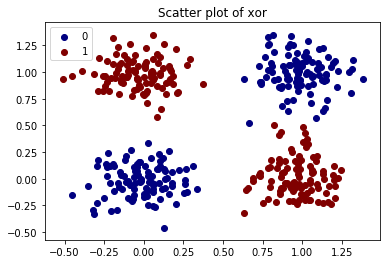

In [10]:
data = loadmat('Data/xor.mat')
x = data['X'][:,0]
y = data['X'][:,1]
classes = data['y'].flatten()

plt.title('Scatter plot of xor')
unique = list(set(classes))
colors = [plt.cm.jet(float(i)/max(unique)) for i in unique]

for i, u in enumerate(unique):
    xi = [x[j] for j  in range(len(x)) if classes[j] == u]
    yi = [y[j] for j  in range(len(x)) if classes[j] == u]
    plt.scatter(xi, yi, c=colors[i], label=str(u))

plt.legend()
plt.show()

If X\[:,0\] and X\[:,1\] are close to each other, then y is 0, of false. And if X\[:,0\] and X\[:,1\] are far away from each other, then y is 1, of true. This makes sense since true XOR false = true, false XOR true = true, false XOR false = false and true XOR true = true.

#### 6.2.3 (2 points)
Create a MLPClassifier with 1 hidden unit. Fit X and y. Use 10-fold cross-validation `KFold` from `sklearn.model_selection` to create training and test sets and estimate the classification error for both. In each fold, run the learning process 5 times and take the best classification error.  

Plot the decision boundaries of one network trained on the entire data set, again with 1 hidden unit, and explain why the network performs so well/poorly.

In [ ]:
# I did not have enough time (and energy) left to finish all exercises from here on.

*Double click to type your answer for 6.2.3 here:*


#### 6.2.4 
Repeat 6.2.3, but use two hidden units instead of one. Does the classification performance improve? Can you explain why?

*Double click to type your answer for 6.2.4 here:*


#### 6.2.5
Repeat 6.2.3 with 10 hidden units. What happens to the decision boundaries of the learned neural networks? What are the benefits and drawbacks of including
many hidden units in the network?

*Double click to type your answer for 6.2.5 here:*
